# EXERCICI 1

## · descarregar el dataset i classificar els registres utilitzant l'algorisme K-means

In [1]:
# step_1: import packages and classes pel dataset

import numpy as np
import pandas as pd

# descàrrega del dataset
fb = pd.read_csv('FB_T.csv')
fb.head()

,status_type,day_published,month_published,year_published,hour_published,minute_published,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,22,4,2018,6,0,262,432,92,3,1,1,0
1,photo,21,4,2018,22,45,0,150,0,0,0,0,0
2,video,21,4,2018,6,17,57,204,21,1,1,0,0
3,photo,21,4,2018,2,29,0,111,0,0,0,0,0
4,photo,18,4,2018,3,22,0,204,9,0,0,0,0


In [2]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_type       7050 non-null   object
 1   day_published     7050 non-null   int64 
 2   month_published   7050 non-null   int64 
 3   year_published    7050 non-null   int64 
 4   hour_published    7050 non-null   int64 
 5   minute_published  7050 non-null   int64 
 6   num_shares        7050 non-null   int64 
 7   num_likes         7050 non-null   int64 
 8   num_loves         7050 non-null   int64 
 9   num_wows          7050 non-null   int64 
 10  num_hahas         7050 non-null   int64 
 11  num_sads          7050 non-null   int64 
 12  num_angrys        7050 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 716.1+ KB


In [3]:
fb.describe()

,day_published,month_published,year_published,hour_published,minute_published,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,15.792624,6.577730,2016.382128,7.829504,27.528936,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,8.728489,3.587108,1.943176,6.886893,17.613119,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,1.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,3.000000,2016.000000,2.000000,12.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,6.000000,2017.000000,7.000000,26.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,10.000000,2018.000000,9.000000,43.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,12.000000,2018.000000,23.000000,59.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [4]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [5]:
! pip install kneed # To install only knee-detection algorithm

In [6]:
! pip install kneed[plot] # To also install plotting functions for quick visualizations

zsh:1: no matches found: kneed[plot]


In [7]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [8]:
features, true_labels = make_blobs(
    n_samples=7000,
    centers=7,
    cluster_std=2.75,
    random_state=53
)

In [9]:
features[:5]

array([[ -1.77997061,   2.50756902],
       [  1.86996443,  -0.56024735],
       [ -9.80268302,  -1.86339522],
       [-11.24526055,   0.27796483],
       [ 11.81349275,   2.42218942]])

In [10]:
true_labels[:5]

array([1, 0, 6, 6, 0])

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
scaled_features[:5]

array([[-0.21991013,  1.35045643],
       [ 0.35553732,  0.4724472 ],
       [-1.4847681 ,  0.09948619],
       [-1.71220436,  0.71234357],
       [ 1.92323043,  1.32602078]])

In [13]:
# algoritme k-means

kmeans = KMeans(
    init="random", # tècnica d'inicialització (versio standard ajustant init a random)
    n_clusters=7, # pasos d'agrupament (paràmetre més important de k-means)
    n_init=10, # número d'execucions a fer (exemple:10)
    max_iter=750, # nñumero màxim d'interaccions per execució
    random_state=53
)

In [14]:
# per cridar atributs de k-means .fit

kmeans.fit(scaled_features)

KMeans(init='random', max_iter=750, n_clusters=7, random_state=53)

In [15]:
# valor més baix de SSE

kmeans.inertia_

2556.3829457801303

In [16]:
# ubicacions dels centroides (total 7 com el n_clusters)

kmeans.cluster_centers_

array([[ 0.03484659,  0.88592459],
       [ 1.13617205,  0.09545659],
       [-0.05169846, -0.32114227],
       [ 1.02035381,  1.57868972],
       [-1.12270903, -1.12083464],
       [ 0.88544876, -1.28921735],
       [-1.3361717 ,  0.33069014]])

In [17]:
# número iteracions necessàries per convergir

kmeans.n_iter_

29

In [18]:
# assignacions de clusters enmagatzemades com array unidimensional

kmeans.labels_[:5] #5 primeres etiquetes

array([0, 0, 6, 6, 3], dtype=int32)

In [19]:
# ordre de  les etiquetes dels clusters depén de  la inicilialització 
# true_labels -> array([1, 0, 6, 6, 0])
# kmeans.labels_ -> array([0, 0, 6, 6, 3], dtype=int32)
# no afecta a les mètriques d'avaluació de clustering

In [20]:
# número apropiat de clusters (elbow method)
# execució de varios k-means, increment de k en cada iteració i registre del SSE

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 750,
    "random_state": 53,
}

# llista valors SSE per cada K

sse = []
for k in range(1,11 ):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # ** operador de Python (iterar amb un diccionari en Python)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)


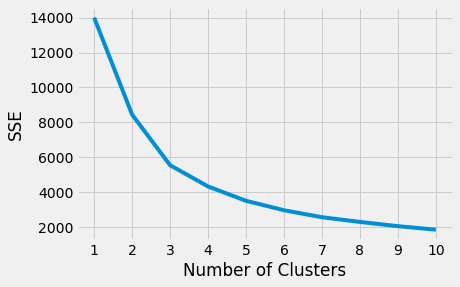

In [21]:
# representació de SSE (suma d'errors al quadrat) en funció del número de clusters

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


### SSE disminueix a mesura que augmenta k
### a més centroides, la distància de cada punto al seu centroide més proper disminuirà
### punt òptim -> COLZE (on la corba SSE comença a corbar-se)

In [22]:
# kneed -> identifica amb programació el punt de colze (útil quan hi ha dubtes)

kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

## número de clústers -> K=3

# EXERCICI 2

## · classificació dels diferents registres utilitzant l'algorisme de clustering jeràrquic

In [23]:
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
%matplotlib inline

In [33]:
# normalització de dades (per millorar funcionament dels algoritmes i convergir més ràpid)
# import packages necessari

from sklearn.preprocessing import normalize

# tria de columnes (eliminació columna 'status_type' (video-photo))

Z = fb.iloc[:, 1:12]

# normalització del dataset

fb_scaled = normalize(Z)
fb_scaled = pd.DataFrame(fb_scaled, columns=Z.columns)
fb_scaled.head()

,day_published,month_published,year_published,hour_published,minute_published,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads
0,0.010564,0.001921,0.969050,0.002881,0.000000,0.125813,0.207448,0.044179,0.001441,0.000480,0.00048
1,0.010374,0.001976,0.996888,0.010868,0.022230,0.000000,0.074100,0.000000,0.000000,0.000000,0.00000
2,0.010348,0.001971,0.994389,0.002957,0.008377,0.028087,0.100523,0.010348,0.000493,0.000493,0.00000
3,0.010389,0.001979,0.998332,0.000989,0.014347,0.000000,0.054913,0.000000,0.000000,0.000000,0.00000
4,0.008874,0.001972,0.994819,0.001479,0.010845,0.000000,0.100566,0.004437,0.000000,0.000000,0.00000


#### escala de les variables és similar

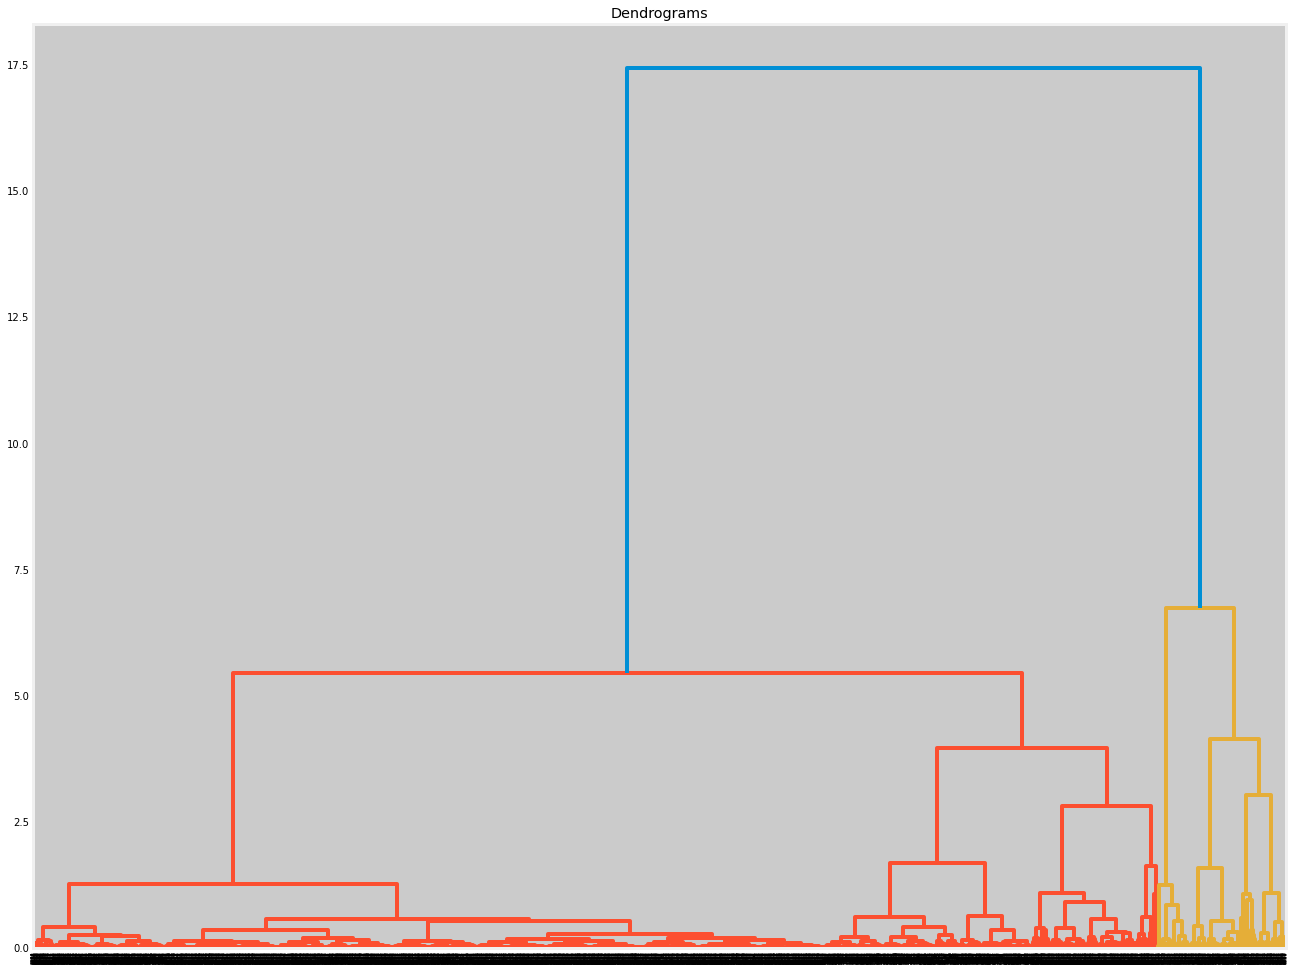

In [35]:
# dendrograma per decidir número de clústers

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 17)) 
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(fb_scaled, method='ward'))

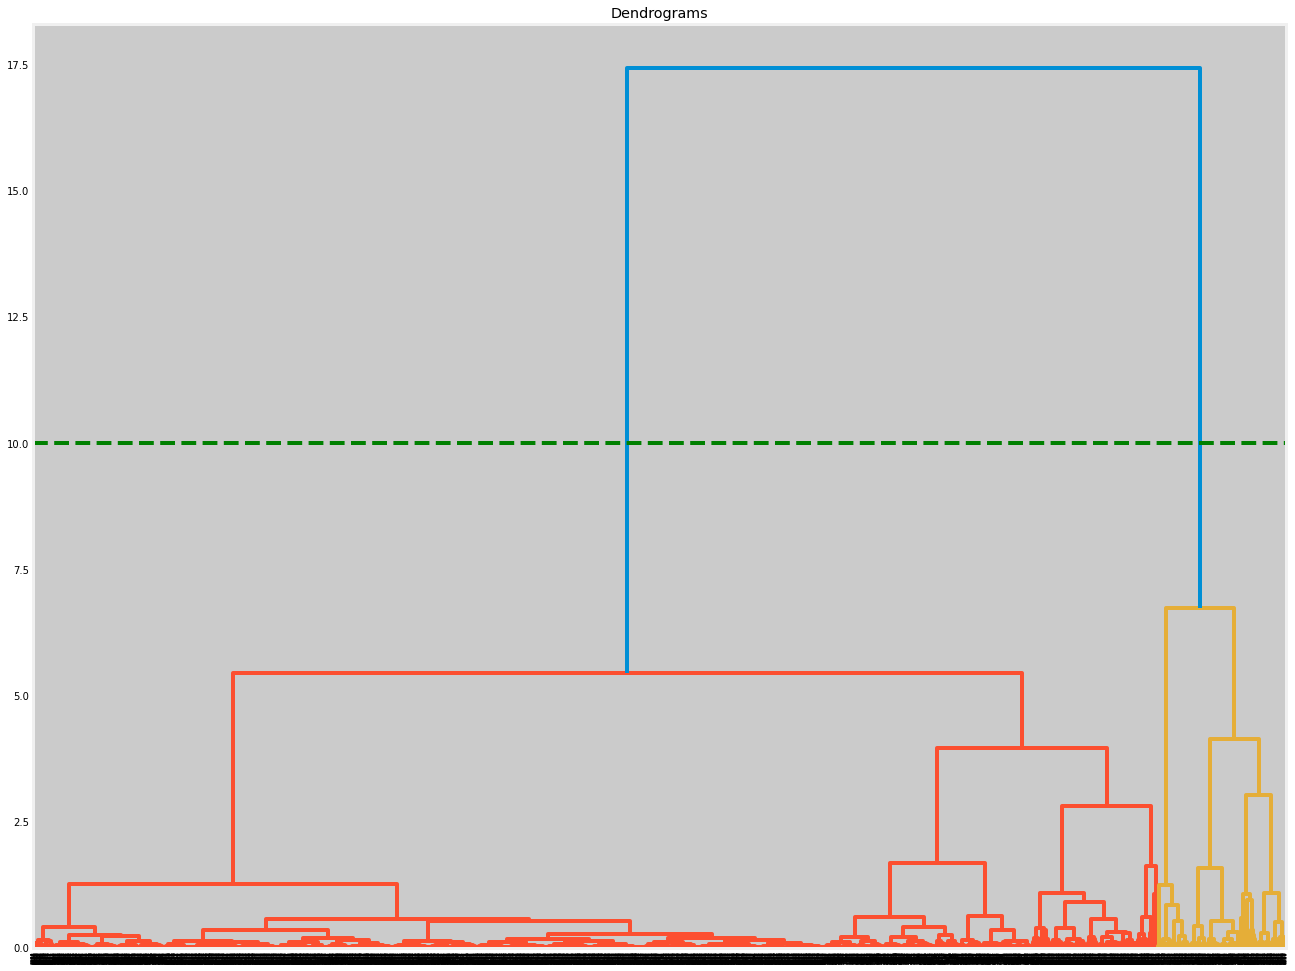

In [42]:
# eix x -> mostres
# eix y -> distància entre mostres (línea blava)
# línia vertical màxima (distància més gran entre mostres) -> línia blava
# tall punt 10 (en distància màxima entre mostres) -> 2 clúster

plt.figure(figsize=(20, 17)) 
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(fb_scaled, method='ward'))
plt.axhline(y=10, color='green', linestyle='--')

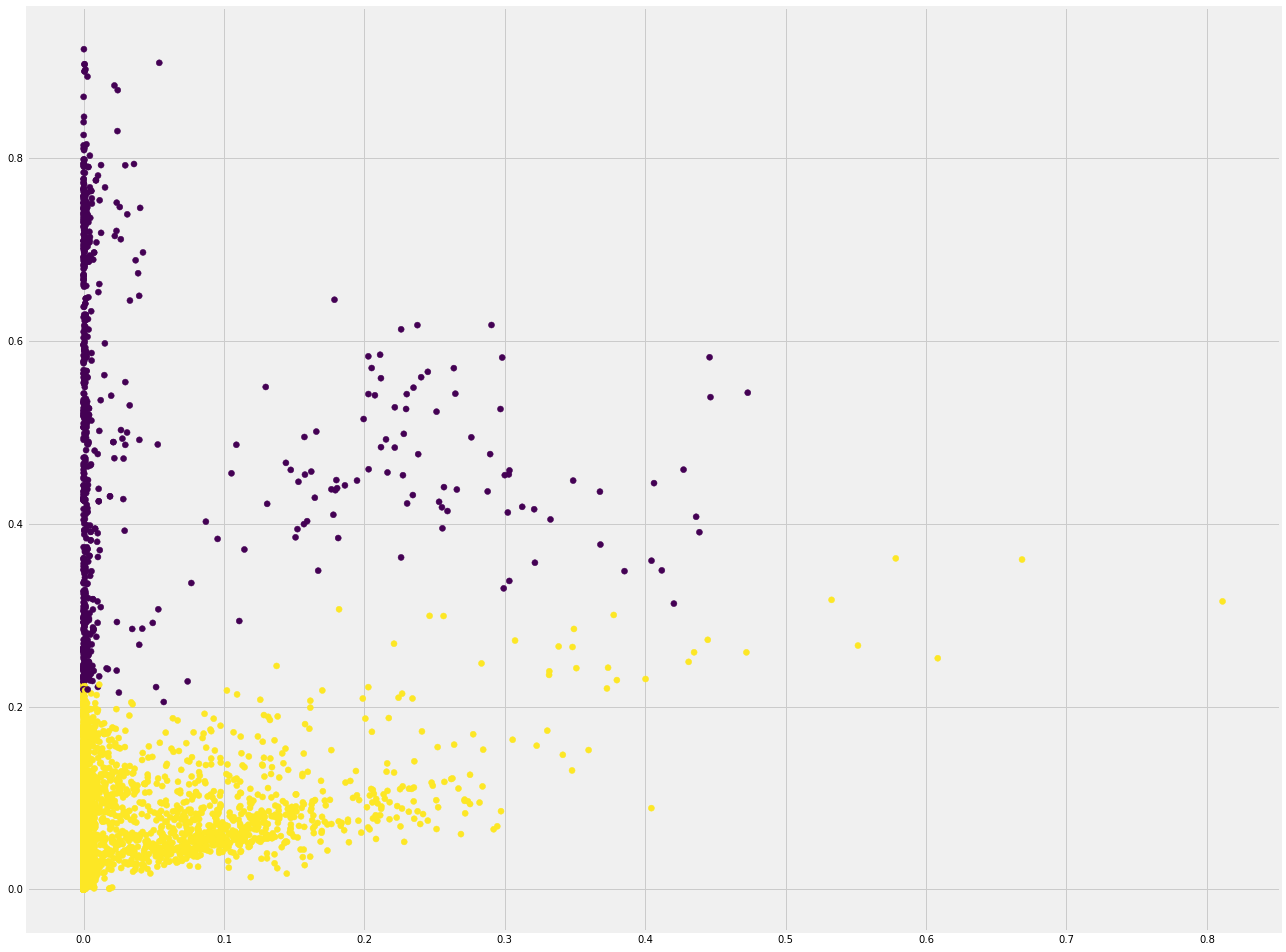

In [61]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

plt.figure(figsize=(20, 17))  
plt.scatter(fb_scaled['num_shares'], fb_scaled['num_likes'], c=cluster.labels_)

# EXERCICI 3
## · rendiment del clustering mitjançant silhouette

In [66]:
# silhouette (coeficient de silueta) -> mesura de la cohesió i separació de clústers
# tècnica d'avaluació complementària amb elbow method

# silhouette per cada K

silhouette_coefficients = []

# inici amb 2 clústers
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

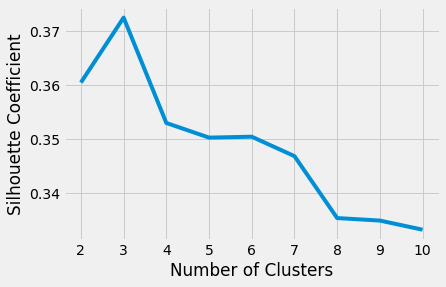

In [67]:
# representació de silhouette per cada K

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## màxima puntuació (número de clústers) -> K=3
## es complementa amb elbow method